In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip install 'h5py==2.10.0' --force-reinstall
!pip install tensorflow==1.15
!pip install keras=2.3.0

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
lucid 0.3.10 requires numpy<=1.19, but you have numpy 1.21.5 which is incompatible.
kapre 0.3.7 requires t

  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
ERROR: Invalid requirement: 'keras=2.3.0'
Hint: = is not a valid operator. Did you mean == ?


Clonar Mask RCNN de MatterPort
- shell de linux para clonar

In [3]:
%%shell
git clone "https://github.com/matterport/Mask_RCNN"
cd Mask_RCNN #donde copiar los archivos
python setup.py install # descargar RQ y librerias

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask

In [4]:
!pip show mask-rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


Red MASK-RCNN:
> en la carpeta samples/demo.ipynb - demostración de como funciona la red.


In [5]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")


Using TensorFlow backend.


... done downloading pretrained model!


In [6]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT =1
  IMAGES_PER_GPU =1
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

>crear modelo para inferir

In [9]:
model = modellib.MaskRCNN(mode= 'inference',model_dir = MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [10]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt

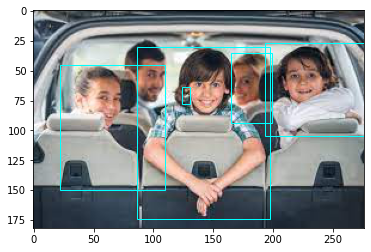

In [28]:
#inferir
img = load_img('mask2.jpg')
img2a= img_to_array(img)
resultado = model.detect([img2a],verbose=0)

# el retorno corresponde a las ROIS, MASK, CLASS_ID, SCORES
cajas = resultado[0]['rois'] # devuelve la priemra caja
plt.imshow(img)
ax= plt.gca() #GET current axes
for bb in cajas: #bb-> boundingBox
  y1,x1,y2,x2 =bb
  w = x2-x1
  h = y2-y1
  rect = Rectangle((x1,y1),w,h,fill = False, color='cyan')
  ax.add_patch(rect)
plt.show()

In [24]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

> Uso de la rede para hacer segmentacion.
>Ellos usan skimage para la carga de imagen (formatos de canales diferentes(RGB) a opencv(BGR))

Processing 1 images
image                    shape: (182, 277, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


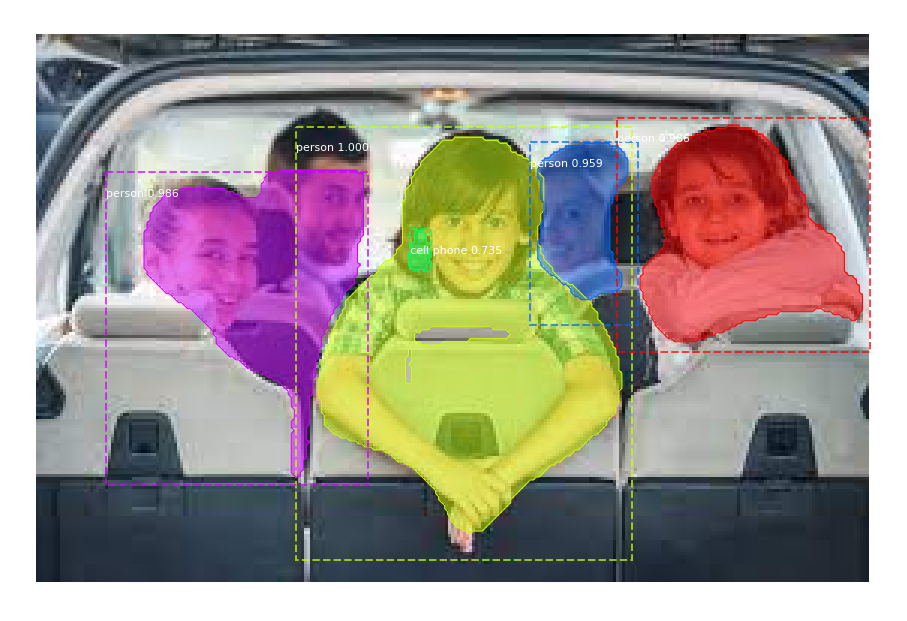

In [27]:
image= skimage.io.imread('mask2.jpg')
resultado2 = model.detect([image],verbose=1)
r= resultado2[0] # Obteniendo la mejor prediccion para un objeto
visualize.display_instances(image, r['rois'],r['masks'],r['class_ids'],class_names, r['scores'])


>Prediccion sobre videos

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
!mkdir -p '/content/drive/MyDrive/MaskRCNN_Images'

In [31]:
import cv2
import numpy as np

In [33]:
def random_colors(N):
    np.random.seed(1)
    colors = [tuple(255 * np.random.rand(3)) for _ in range(N)]
    return colors

def apply_mask(image, mask, color, alpha=0.5):
    """apply mask to image"""
    for n, c in enumerate(color):
        image[:, :, n] = np.where(
            mask == 1,
            image[:, :, n] * (1 - alpha) + alpha * c,
            image[:, :, n]
        )
    return image

def display_instances(image, boxes, masks, ids, names, scores):
  """
      take the image and results and apply the mask, box, and Label
  """
  n_instances = boxes.shape[0]
  colors = random_colors(n_instances)
  if not n_instances:
      print('NO INSTANCES TO DISPLAY')
  else:
      assert boxes.shape[0] == masks.shape[-1] == ids.shape[0]
  for i, color in enumerate(colors):
      if not np.any(boxes[i]):
          continue
      y1, x1, y2, x2 = boxes[i]
      label = names[ids[i]]
      score = scores[i] if scores is not None else None
      caption = '{} {:.2f}'.format(label, score) if score else label
      mask = masks[:, :, i]
      image = apply_mask(image, mask, color)
      image = cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
      image = cv2.putText(
          image, caption, (x1, y1), cv2.FONT_HERSHEY_COMPLEX, 0.7, color, 2
      )
  return image

In [35]:
# capturar el video y procesarlo frame a frame
cap = cv2.VideoCapture('pedestrians.mp4')
frame_count = 0
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080) #setear alto
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920) # setear ancho
while True:
  ret, frame = cap.read()  #lee fram x frame el mp4
  if not ret:
    break
  frame_count += 1
  print('Numero de frames : {0}'.format(frame_count))
  results = model.detect([frame], verbose=0)
  r = results[0]
  frame = display_instances(frame, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])
  fname= '{0}.jpg'.format(frame_count) # guarda el frame como imagen
  fname = os.path.join('/content/drive/MyDrive/MaskRCNN_Images',fname)#guarda las imagenes en la carpeta
  cv2.imwrite(fname, frame) #escribe imagen x imagen en la carpeta
  print('El archivo fue escrito en :{0}',format(fname))
cap.release()

Numero de frames : 1
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/1.jpg
Numero de frames : 2
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/2.jpg
Numero de frames : 3
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/3.jpg
Numero de frames : 4
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/4.jpg
Numero de frames : 5
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/5.jpg
Numero de frames : 6
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/6.jpg
Numero de frames : 7
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/7.jpg
Numero de frames : 8
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/8.jpg
Numero de frames : 9
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/9.jpg
Numero de frames : 10
El archivo fue escrito en :{0} /content/drive/MyDrive/MaskRCNN_Images/10.jpg
Numero de frames : 11
El arc

KeyboardInterrupt: ignored

In [36]:
from cv2 import VideoWriter, VideoWriter_fourcc, imread,resize
import glob
images = list(glob.iglob(os.path.join('/content/drive/MyDrive/MaskRCNN_Images','*.jpg')))
images = sorted(images,key=lambda x:float(os.path.split(x)[1][:-3]))
video_output = os.path.join('/content/drive/MyDrive/MaskRCNN_Images','enmascarado.mp4')
fourcc =VideoWriter_fourcc(*'FMP4')
vid =None
size= None
is_color = True
for image in images:
  img = imread(image)
  if vid is None:
    if size is None:
      size = img.shape[1], img.shape[0]
    vid = VideoWriter(video_output, fourcc, float(30), size, is_color)
  if size[0] != img.shape[1] and size[1] != img.shape[0]:
    img = resize(img,size)
  vid.write(img)
vid.release()